In [1]:
import numpy as np
from keras.datasets import reuters
from keras.utils.data_utils import pad_sequences
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, MaxPooling1D, Flatten, Dropout, GlobalAveragePooling1D

## Data Loading and Preprocessing

In [2]:
max_words = 10000
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=max_words, test_split=0.2)

In [3]:
max_length = 500
x_train = pad_sequences(x_train, maxlen=max_length)
x_test = pad_sequences(x_test, maxlen=max_length)

In [4]:
num_classes = np.max(y_train) + 1
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

## Model Building and Training

In [5]:
model = Sequential()
model.add(Embedding(10000, 128, input_length=max_length))
model.add(Conv1D(128, 5, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   


2023-07-29 20:23:05.834996: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


 embedding (Embedding)       (None, 500, 128)          1280000   
                                                                 
 conv1d (Conv1D)             (None, 496, 128)          82048     
                                                                 
 global_max_pooling1d (Globa  (None, 128)              0         
 lMaxPooling1D)                                                  
                                                                 
 dense (Dense)               (None, 128)               16512     
                                                                 
 dense_1 (Dense)             (None, 46)                5934      
                                                                 
Total params: 1,384,494
Trainable params: 1,384,494
Non-trainable params: 0
_________________________________________________________________
None


In [6]:
batch_size = 50
epochs = 10

hist = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(x_test, y_test))

Epoch 1/10
180/180 [==============================] - 31s 167ms/step - loss: 1.9718 - accuracy: 0.5366 - val_loss: 1.4271 - val_accuracy: 0.6745
Epoch 2/10
180/180 [==============================] - 32s 176ms/step - loss: 1.1300 - accuracy: 0.7344 - val_loss: 1.0619 - val_accuracy: 0.7556
Epoch 3/10
180/180 [==============================] - 34s 188ms/step - loss: 0.7726 - accuracy: 0.8122 - val_loss: 0.9345 - val_accuracy: 0.7783
Epoch 4/10
180/180 [==============================] - 35s 196ms/step - loss: 0.5254 - accuracy: 0.8675 - val_loss: 0.8885 - val_accuracy: 0.7876
Epoch 5/10
180/180 [==============================] - 38s 212ms/step - loss: 0.3636 - accuracy: 0.9076 - val_loss: 0.9076 - val_accuracy: 0.7961
Epoch 6/10
180/180 [==============================] - 39s 217ms/step - loss: 0.2686 - accuracy: 0.9338 - val_loss: 0.9633 - val_accuracy: 0.7947
Epoch 7/10
180/180 [==============================] - 35s 196ms/step - loss: 0.2221 - accuracy: 0.9453 - val_loss: 0.9901 - val_ac

## Evaluation

In [7]:
score = model.evaluate(x_test, y_test, batch_size=batch_size)
print(f'Test loss: {score[0]}')
print(f'Test accuracy: {score[1]}')

45/45 [==============================] - 2s 37ms/step - loss: 1.0238 - accuracy: 0.7947
Test loss: 1.023759126663208
Test accuracy: 0.7947462201118469


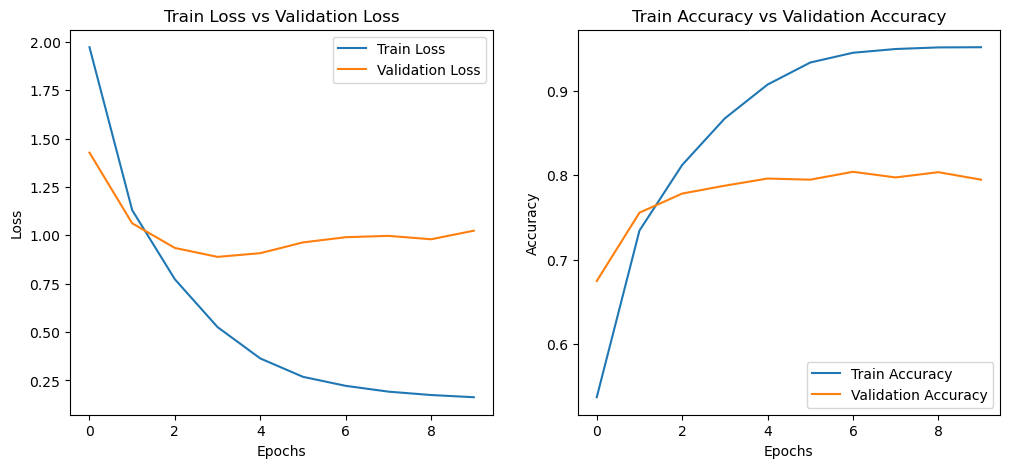

In [8]:
import matplotlib.pyplot as plt

def plot_loss_and_acc(hist):
    train_loss = hist.history["loss"]
    train_acc = hist.history["accuracy"]
    val_loss = hist.history["val_loss"]
    val_acc = hist.history["val_accuracy"]

    fig = plt.figure(figsize=(12,5))

    ax = fig.add_subplot(121)
    ax.plot(range(len(train_loss)), train_loss, label="Train Loss");
    ax.plot(range(len(val_loss)), val_loss, label="Validation Loss");
    plt.xlabel("Epochs"); plt.ylabel("Loss");
    plt.title("Train Loss vs Validation Loss");
    plt.legend(loc="best");

    ax = fig.add_subplot(122)
    ax.plot(range(len(train_acc)), train_acc, label="Train Accuracy");
    ax.plot(range(len(val_acc)), val_acc, label="Validation Accuracy");
    plt.xlabel("Epochs"); plt.ylabel("Accuracy");
    plt.title("Train Accuracy vs Validation Accuracy");
    plt.legend(loc="best");

plot_loss_and_acc(hist)